In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi, Avogadro

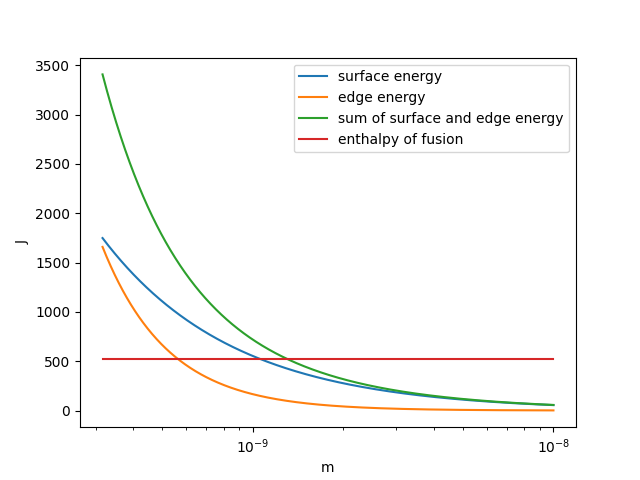

In [14]:
def oppg1ae():
    mass = 1  # 1g NaCl
    density = 2.17  # g / cm^3
    surface_energy_density = 2e-5  # J / cm^2
    edge_energy_density = 3e-13  # J / cm
    enthalpy_of_fusion = 0.52e3  # J / g

    vol = mass / density
    biggest_sidelength = vol ** (1 / 3)
    # sidelength = np.array([biggest_sidelength / (50e4 * n) for n in range(1, 1001)])
    sidelength = np.logspace(-9.5, -8, num=1000) * 1e2

    vol_per_cube = sidelength**3
    num_cubes = vol / vol_per_cube
    total_area = sidelength**2 * 6 * num_cubes
    total_surface_energy = total_area * surface_energy_density

    total_edge_length = sidelength * 12 * num_cubes
    total_edge_energy = total_edge_length * edge_energy_density

    # Conversions to SI units
    sidelength = sidelength * 1e-2
    _, ax = plt.subplots()
    ax.plot(sidelength, total_surface_energy, label="surface energy")
    ax.plot(sidelength, total_edge_energy, label="edge energy")
    ax.plot(
        sidelength,
        total_edge_energy + total_surface_energy,
        label="sum of surface and edge energy",
    )
    ax.plot(
        sidelength,
        np.ones_like(sidelength) * enthalpy_of_fusion,
        label="enthalpy of fusion",
    )
    ax.legend()
    # ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("Energy (J)")
    ax.set_xlabel("Sidelength (m)")
    plt.show()

oppg1ae()

## Oppg 1c

About at $a=1.4 nm$

## Oppg 1d

Nanoparticles have a lower melting point than bulk NaCl

## Oppg 1e

We have approximated NaCl to form spheres
and that the surface and edge energy to be directly proportional
to area and edge length even at low sidelengths.
I dont think this will hold experimentally

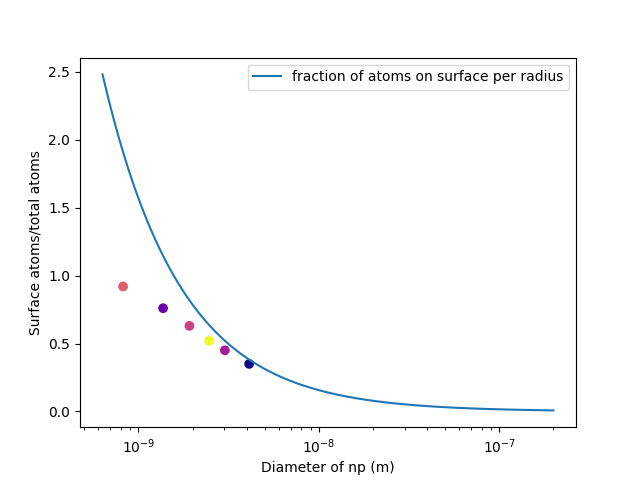

In [31]:
def oppg1fh():
    mass = 1  # 1g NaCl
    density = 12.0  # g / cm^3
    atomic_radius = 1.37e-8  # cm
    molar_mass = 106.4  # g / mol

    vol = mass / density
    biggest_radius = vol ** (1 / 3) / pi
    smallest_radius = atomic_radius
    # radii = np.linspace(smallest_radius, biggest_radius / 100, 1000)
    radii = np.logspace(-9.5, -7, num=1000) * 1e2
    # radii = np.array([smallest_radius * n for n in range(1, 1001)])
    volume_of_np = radii**3 * pi

    # Calculate total num
    weight_of_np = volume_of_np * density  # g
    amount_of_atoms = weight_of_np / molar_mass  # mol
    amount_of_atoms = amount_of_atoms * Avogadro  # number

    # one surface atom uses 4 * atomic_radius**2 space on surface
    area_consumed_per_atom = 4 * atomic_radius**2
    surface_of_np = 4 * pi * radii**2
    atoms_on_surface = surface_of_np / area_consumed_per_atom
    # atoms_in_bulk = amount_of_atoms - atoms_on_surface

    fraction_on_surface = atoms_on_surface / amount_of_atoms

    # Make si
    radii *= 1e-2
    diameter = radii * 2
    atomic_radius *=1e-2

    manuals = np.array(
        [
            [(1 * 2 * atomic_radius + atomic_radius) * 2, 0.92],
            [(2 * 2 * atomic_radius + atomic_radius) * 2, 0.76],
            [(3 * 2 * atomic_radius + atomic_radius) * 2, 0.63],
            [(4 * 2 * atomic_radius + atomic_radius) * 2, 0.52],
            [(5 * 2 * atomic_radius + atomic_radius) * 2, 0.45],
            [(7 * 2 * atomic_radius + atomic_radius) * 2, 0.35],
        ]
    )

    _, ax = plt.subplots()
    ax.plot(
        diameter, fraction_on_surface, label="fraction of atoms on surface per radius"
    )
    ax.scatter(manuals[:, 0], manuals[:, 1], c=np.random.rand(6), cmap="plasma")
    ax.legend()
    # ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("Surface atoms/total atoms")
    ax.set_xlabel("Diameter of np (m)")

    plt.show()

oppg1fh()

## Oppg 1g
The lower limit of `a` for which the result in `f` makes sense is
when `a` is close to the atomic radius

## Oppg 2a

The lattice parameter of a metal nanoparticle with a clean surface is affected by nanoparticle size like this:  
For very small particles, lattice parameter reduces due to dangling bonds. This effect is analogous to the fact that double bonds are shorter than single bonds.

## Oppg 2b

For a solid with a _fixed surface area_, the main ways in which the surface energy can be reduced is:

- Binding to similar atoms
- Increase the density of the surface